# 환경 세팅 및 데이터셋 업로드

In [ ]:
#코랩 환경 준비 및 ultralytics 설치
!pip install ultralytics roboflow

In [ ]:
# 로보플로에서 api 활용한 데이터셋 다운로드(YOLOv8 포맷)
from roboflow import Roboflow

rf = Roboflow(api_key="bGEamJdSzr5rBrg9Sjne")
project = rf.workspace("kiosk-nmotv").project("osp-bao99")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


# YOLOv8 모델 학습시키기

In [ ]:
# -------yolov8 학습 코드--------
from ultralytics import YOLO
# 하이퍼파라미터를 변수로 저장 (이걸로 다른 셀에서도 접근 가능!)
epochs = 150
batch = 32                 # 배치 크기 (GPU 메모리에 따라 조절)

# 데이터셋 yaml 경로 확인 (Roboflow에서 다운로드된 경로)
data_yaml = dataset.location + "/data.yaml"

# 원하는 모델 선택 (yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt)
model = YOLO('yolov8s.pt') # 해보고 과적합되면 yolov8n.pt로 시도해보기

# 학습 시작
results = model.train(
    data=data_yaml,     # 데이터셋 yaml 파일 경로
    epochs=epochs,
    batch=batch,
    imgsz=640,          # 입력 이미지 크기
    name='yolov8s_custom', # 결과 저장 폴더명
    exist_ok=True,

    #patience=20,       # Early Stopping 추가 : 20 epoch 동안 val loss가 개선되지 않으면 학습 중단. 오버피팅 방지

    # 증강 파라미터 추가해봄 #
    # hsv_h=0.1,
    # hsv_s=0.7,
    # hsv_v=0.4,
    # degrees=10,
    # translate=0.1,
    # scale=0.5,
    # shear=2,
    # perspective=0.001,
    # flipud=0.5,
    # fliplr=0.5,
    # mosaic=1.0,
    # mixup=0.2,

)

val_results = model.val(
    data = data_yaml,
    split = 'test',
    plots = True,
    save_json = True,
    exist_ok=True
)

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/OSP-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

train: Scanning /content/OSP-4/train/labels.cache... 372 images, 3 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 322.4±247.2 MB/s, size: 41.4 KB)


val: Scanning /content/OSP-4/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8s_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_custom
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      7.27G      1.833      15.23      1.623         32        640: 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         20         20      0.256     0.0779     0.0849     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      7.27G      1.202      3.962      1.211         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         20         20      0.668      0.412      0.311      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      7.28G      1.049      2.263       1.04         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         20         20       0.74      0.327      0.585      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      7.28G      1.034      1.661       1.06         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         20         20      0.843       0.15      0.304      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      7.28G      1.025       1.41      1.033         30        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         20         20      0.454      0.687      0.451       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      7.32G     0.9878      1.219      1.019         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         20         20      0.131      0.267       0.22      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      7.35G     0.9701       1.16      1.024         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         20         20      0.677      0.675      0.666      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      7.39G      0.978      1.072      1.035         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         20         20      0.344      0.483      0.385      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      7.03G      1.023      1.085      1.045         40        640: 100%|██████████| 12/12 [00:09<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         20         20      0.533      0.165      0.179      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      7.06G     0.9854      1.055      1.046         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         20         20      0.782      0.456      0.502      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      7.06G     0.9917      1.056      1.053         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         20         20      0.699      0.258      0.476      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      7.06G     0.9993     0.9949      1.036         35        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         20         20      0.417      0.738      0.473      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      7.07G     0.9615     0.8779      1.047         32        640: 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         20         20      0.654      0.263      0.374      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150       7.1G     0.9756     0.8848      1.044         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         20         20      0.782      0.416      0.517      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      7.14G     0.9245     0.8013      1.013         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         20         20      0.813      0.478      0.688      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      7.18G     0.9262     0.7935      1.026         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         20         20      0.601      0.636      0.675      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      7.21G     0.8918     0.7736      1.014         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         20         20      0.798      0.571      0.823      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      7.25G     0.9025     0.7688      1.016         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         20         20      0.577      0.645      0.721      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      7.28G     0.8993      0.746      1.004         30        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         20         20      0.505      0.824      0.822      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      7.32G     0.8888     0.7297     0.9961         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         20         20      0.763      0.562      0.741      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      7.36G      0.882     0.7132      1.011         30        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         20         20      0.779      0.817      0.794      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      7.39G      0.863     0.6928      1.012         32        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         20         20      0.748      0.487      0.715      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      7.39G     0.8666     0.7109     0.9896         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         20         20      0.721      0.529      0.615      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      7.31G     0.8558      0.717     0.9919         21        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         20         20      0.681      0.742      0.779      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      7.34G     0.8566     0.7057       1.01         35        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         20         20      0.569       0.62      0.701      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      7.34G     0.8259     0.6472     0.9785         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         20         20      0.871      0.648      0.755      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      7.34G     0.8671     0.6551     0.9824         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         20         20      0.552       0.86      0.693      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      7.34G     0.8312     0.6689     0.9912         32        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         20         20      0.609      0.741      0.832      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      7.34G     0.8016     0.6373     0.9762         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         20         20      0.697      0.717      0.785      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      7.34G     0.8136     0.6031     0.9754         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         20         20      0.729      0.678      0.805       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      7.38G     0.8035     0.6078     0.9664         30        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         20         20      0.747      0.717      0.749      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      7.01G     0.8019     0.6115     0.9557         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         20         20      0.857       0.83      0.849      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      7.01G     0.8126     0.6086     0.9755         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         20      0.672      0.725      0.826      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      7.01G     0.8033     0.6296     0.9745         30        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         20         20       0.64      0.794      0.725      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      7.01G     0.7896     0.5559     0.9483         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         20         20      0.815      0.758      0.816      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      7.05G     0.8029     0.5897     0.9827         23        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         20         20      0.743      0.665      0.891      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      7.09G     0.8112      0.582     0.9728         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20         20      0.544      0.654      0.716      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      7.12G     0.7769     0.5748     0.9757         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         20         20      0.826      0.633      0.859      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      7.16G     0.7331      0.562     0.9422         33        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         20         20      0.797       0.82      0.857        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      7.19G     0.7627     0.5405      0.958         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         20         20      0.747      0.831      0.813      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      7.23G     0.7433     0.5677     0.9489         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         20         20      0.844      0.853      0.905      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      7.27G     0.7244     0.5783     0.9546         32        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         20         20      0.882      0.773       0.79        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       7.3G     0.7094     0.5412      0.929         38        640: 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         20         20      0.827      0.587      0.723      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150       7.3G     0.7286     0.5473     0.9529         39        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         20         20      0.833      0.533      0.579      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150       7.3G     0.7433     0.5508     0.9565         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         20         20      0.558      0.592      0.645      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150       7.3G      0.724      0.547      0.953         26        640: 100%|██████████| 12/12 [00:08<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         20         20      0.699      0.733      0.742      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150       7.3G     0.7395     0.5611     0.9407         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         20         20      0.698      0.671      0.743      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       7.3G     0.7186     0.5275     0.9163         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         20         20      0.631      0.882      0.892      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       7.3G       0.73     0.5312     0.9442         34        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         20         20      0.596      0.867      0.851       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       7.3G      0.714     0.5178     0.9215         37        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         20         20      0.652      0.734      0.792      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150       7.3G     0.7419     0.5134     0.9327         29        640: 100%|██████████| 12/12 [00:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         20         20      0.828      0.827      0.895      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150       7.3G     0.7126     0.5084     0.9274         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         20         20      0.835      0.669      0.741      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150       7.3G     0.7385     0.5258     0.9592         40        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         20         20      0.804      0.782      0.843      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150       7.3G     0.7138     0.5054      0.943         35        640: 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         20         20       0.75      0.759       0.85      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150       7.3G     0.6873     0.4927     0.9252         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         20         20      0.698      0.784      0.834      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       7.3G     0.7204     0.4925     0.9347         31        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         20         20      0.902      0.717      0.816      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       7.3G     0.6853     0.4917     0.9272         32        640: 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         20         20       0.95      0.734      0.855      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       7.3G     0.6586     0.4887     0.9086         33        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         20         20       0.88      0.762      0.871      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150       7.3G     0.6789     0.4742     0.9271         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         20         20      0.838      0.832      0.916      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150       7.3G     0.6674     0.4436     0.9199         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         20         20      0.958      0.737      0.922      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150       7.3G     0.6553     0.4493      0.914         24        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         20         20      0.919      0.742      0.917      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       7.3G     0.6604     0.4639     0.9139         33        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         20         20      0.922      0.757      0.907       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150       7.3G     0.6798     0.4631     0.9151         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         20         20      0.939      0.818      0.909      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       7.3G     0.6645     0.4568     0.9207         32        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         20         20      0.869      0.827      0.905       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150       7.3G     0.6682      0.455     0.9261         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         20         20      0.942      0.767      0.893       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       7.3G     0.6394     0.4533     0.9151         39        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         20         20      0.953      0.822        0.9       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150       7.3G     0.6888     0.4668     0.9044         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         20         20      0.867      0.783      0.859      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       7.3G     0.6935     0.4424     0.9096         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20         20      0.879      0.783      0.869      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150       7.3G     0.6214     0.4382     0.9018         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         20         20      0.898      0.758      0.861      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       7.3G     0.6343     0.4377     0.9067         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         20         20      0.726      0.738      0.839      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150       7.3G       0.63     0.4374     0.9131         40        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         20         20      0.725      0.888      0.914      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150       7.3G      0.651     0.4477     0.9116         35        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         20         20      0.936      0.883      0.917      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150       7.3G     0.6466     0.4321     0.9202         31        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         20         20      0.916      0.817      0.878      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       7.3G      0.646     0.4426     0.9184         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         20         20       0.78      0.814      0.887      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150       7.3G     0.6562     0.4425      0.903         33        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         20         20       0.83        0.8      0.856      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150       7.3G     0.6402     0.4425     0.9151         17        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         20         20      0.822      0.807      0.846      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       7.3G     0.6374      0.443     0.9123         36        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         20         20      0.894      0.764      0.896      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       7.3G     0.6313     0.4383     0.9188         39        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         20         20      0.889      0.835      0.968      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150       7.3G     0.6324     0.4165     0.9169         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         20         20      0.931      0.863      0.948      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       7.3G     0.6449     0.4189     0.9084         46        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20         20      0.847       0.85      0.899      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150       7.3G     0.6055      0.418     0.8912         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         20         20      0.819      0.798      0.831      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150       7.3G     0.5989     0.4113     0.8967         32        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         20         20      0.924      0.753       0.89      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150       7.3G     0.5897     0.4246     0.8994         19        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         20         20      0.718      0.747      0.877      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150       7.3G      0.598     0.3914     0.8904         36        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         20         20      0.932      0.762      0.869      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150       7.3G     0.6332     0.4294     0.9089         41        640: 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         20         20      0.896      0.722      0.768      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150       7.3G     0.5968     0.3901     0.9019         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         20         20      0.961      0.756      0.883      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150       7.3G     0.6012     0.3989     0.8941         35        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         20         20      0.952      0.744      0.923      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150       7.3G     0.5806     0.3892        0.9         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         20         20      0.898      0.785      0.931       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150       7.3G     0.5804     0.3908     0.9017         33        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         20         20      0.907      0.815      0.907      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       7.3G     0.5886     0.3724     0.9004         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         20         20      0.938      0.731      0.842      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150       7.3G     0.5883     0.3845     0.8979         34        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         20         20      0.907      0.734      0.854      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150       7.3G     0.5878     0.3691       0.89         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         20         20      0.923      0.755      0.881      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150       7.3G     0.5831     0.3767     0.9006         30        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         20         20      0.869      0.867      0.907      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150       7.3G     0.5547     0.3666     0.8845         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         20         20      0.898      0.873      0.906      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150       7.3G     0.5796     0.3801     0.8893         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         20         20      0.897      0.851      0.894      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150       7.3G     0.5762     0.3865     0.8847         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         20         20      0.865      0.859      0.889      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150       7.3G     0.5517     0.3672     0.8875         35        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         20         20      0.906      0.848      0.967      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150       7.3G     0.5547     0.3635      0.886         41        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         20         20      0.911      0.756      0.865      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150       7.3G     0.5776     0.3737     0.8894         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         20         20      0.911      0.766      0.855      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150       7.3G       0.53     0.3572     0.8819         34        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         20         20      0.952      0.899      0.984      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150       7.3G     0.5605     0.3669     0.8913         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         20         20      0.965      0.848      0.974      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150       7.3G     0.5272     0.3536     0.8733         30        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         20         20      0.947      0.825      0.917      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150       7.3G     0.5448      0.354     0.8927         38        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         20         20      0.944      0.815      0.927      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150       7.3G     0.5336      0.345     0.8752         35        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         20         20      0.921      0.855      0.951      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150       7.3G      0.516     0.3438     0.8919         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         20         20      0.899      0.837      0.916      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150       7.3G     0.5311     0.3441     0.8835         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         20         20      0.948       0.75       0.84      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150       7.3G     0.5065     0.3403     0.8587         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         20         20      0.948      0.762      0.857      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150       7.3G      0.516     0.3388     0.8765         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         20         20      0.929      0.811      0.906      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150       7.3G     0.5464     0.3565      0.889         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         20         20      0.885      0.831      0.911      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150       7.3G     0.5332     0.3495     0.8774         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         20         20      0.957      0.734      0.899      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150       7.3G     0.5198     0.3373     0.8671         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         20         20      0.932      0.711      0.836      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150       7.3G     0.5396     0.3785     0.8838         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         20         20      0.918      0.735      0.863      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150       7.3G     0.4983     0.3326     0.8793         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         20         20       0.92      0.806      0.933      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150       7.3G     0.5095     0.3393     0.8614         36        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         20         20      0.917      0.798      0.933      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150       7.3G     0.5165     0.3322     0.8734         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         20         20      0.917      0.731      0.896      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150       7.3G     0.5124     0.3292     0.8732         40        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         20         20      0.955      0.723      0.902      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150       7.3G     0.4931     0.3359      0.867         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         20         20       0.96      0.734      0.907      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150       7.3G     0.5029      0.333     0.8695         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         20         20      0.921      0.772      0.927      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150       7.3G     0.4905     0.3289     0.8549         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         20         20      0.876      0.904      0.968      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150       7.3G     0.4781     0.3212     0.8562         35        640: 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         20         20      0.875      0.916      0.968      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150       7.3G     0.4953      0.329     0.8664         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         20         20      0.956      0.816      0.954      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150       7.3G     0.4773     0.3203     0.8574         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         20         20      0.861      0.909      0.959      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150       7.3G     0.4804      0.312     0.8803         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         20         20      0.882      0.902      0.955      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150       7.3G     0.4698     0.3102     0.8633         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         20         20      0.914      0.834      0.925      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150       7.3G     0.4743        0.3     0.8736         34        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         20         20      0.915      0.836      0.925      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150       7.3G     0.4616     0.3138     0.8707         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         20         20      0.896       0.83      0.933      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150       7.3G     0.4865      0.308     0.8702         32        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         20         20      0.765      0.915      0.937      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150       7.3G     0.4672     0.3096     0.8556         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         20         20      0.901       0.79      0.932      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150       7.3G     0.4746     0.3021     0.8596         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         20         20      0.922      0.793      0.945      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150       7.3G       0.46     0.2919     0.8638         38        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         20         20      0.921      0.802      0.945      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150       7.3G     0.4525     0.2983     0.8537         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         20         20      0.901        0.8      0.928      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150       7.3G     0.4535     0.2999     0.8534         35        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         20         20      0.947      0.745      0.928      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150       7.3G     0.4569        0.3      0.851         41        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         20         20      0.953       0.75       0.92      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150       7.3G     0.4415      0.297     0.8536         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         20         20      0.957       0.75      0.904      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150       7.3G     0.4566     0.2911     0.8486         34        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         20         20      0.955      0.746      0.901       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150       7.3G     0.4384     0.2955     0.8432         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         20         20      0.953      0.744      0.906      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150       7.3G     0.4512     0.2925       0.86         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         20         20      0.951      0.743      0.918       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150       7.3G     0.4467     0.2894     0.8549         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         20         20      0.754       0.92      0.926      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150       7.3G     0.4292     0.2844     0.8474         36        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         20         20      0.745      0.925      0.929      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       7.3G     0.4566     0.3022     0.8541         35        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         20         20      0.786      0.869      0.928       0.75


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150       7.3G      0.422     0.2898     0.8386         18        640: 100%|██████████| 12/12 [00:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         20         20      0.951      0.745      0.924      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150       7.3G     0.4102     0.2696     0.8354         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         20         20      0.946      0.764      0.905      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150       7.3G     0.4022     0.2622     0.8466         19        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20         20      0.943       0.76      0.903      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150       7.3G     0.3974     0.2583     0.8267         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         20         20      0.903      0.785      0.909      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150       7.3G      0.415     0.2689     0.8228         16        640: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         20         20      0.851      0.852      0.923      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       7.3G     0.4109      0.262      0.829         19        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         20         20      0.853      0.855      0.909      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150       7.3G     0.4024      0.264     0.8331         19        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         20         20      0.842      0.858       0.91      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150       7.3G     0.3696     0.2441     0.8228         18        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         20         20       0.88      0.801      0.901      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150       7.3G     0.3759     0.2516     0.8375         19        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         20         20      0.842      0.823      0.902      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150       7.3G     0.3611     0.2425     0.8193         18        640: 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         20         20      0.846       0.83      0.905      0.752



150 epochs completed in 0.355 hours.
Optimizer stripped from runs/detect/yolov8s_custom/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/yolov8s_custom/weights/best.pt, 22.6MB

Validating runs/detect/yolov8s_custom/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


                   all         20         20      0.952      0.898      0.984      0.796
                  next          1          1      0.965          1      0.995      0.895
        option_confirm          3          3      0.804          1      0.995      0.865
                   pay          5          5       0.98          1      0.995      0.791
        payment_method          5          5          1      0.458      0.928      0.812
               receipt          4          4          1      0.931      0.995      0.646
                 start          2          2      0.965          1      0.995      0.766
Speed: 0.2ms preprocess, 6.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/yolov8s_custom
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 859.3±323.8 MB/s, size: 41.8 KB)


val: Scanning /content/OSP-4/test/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


                   all         11         11      0.919          1      0.995      0.766
                  next          1          1      0.965          1      0.995      0.597
        option_confirm          1          1      0.822          1      0.995      0.697
                   pay          2          2      0.913          1      0.995      0.705
        payment_method          3          3      0.932          1      0.995       0.97
               receipt          2          2      0.942          1      0.995      0.796
                 start          2          2       0.94          1      0.995      0.829
Speed: 0.2ms preprocess, 11.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Saving runs/detect/yolov8s_custom/predictions.json...
Results saved to runs/detect/yolov8s_custom


# 추론 테스트 코드


image 1/1 /content/OSP-4/test/images/-_01_jpg.rf.24a65e4c2a3a4ac54a7ebbd0ac1d5755.jpg: 640x640 1 pay, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


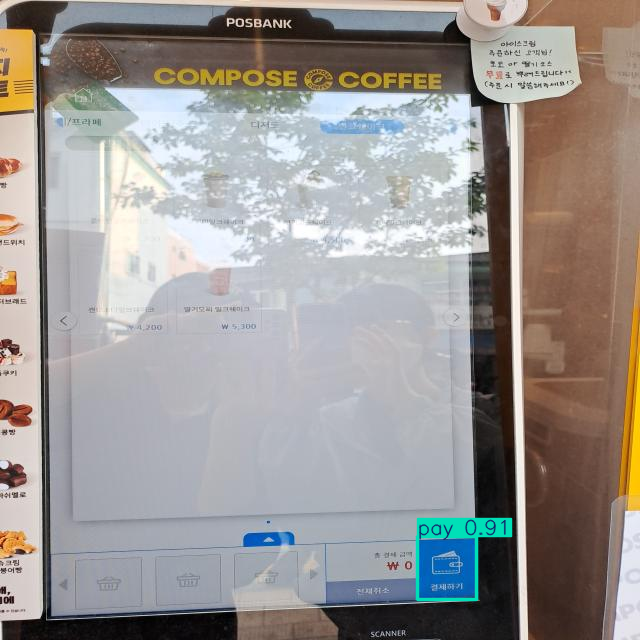


image 1/1 /content/OSP-4/test/images/-_01_jpg.rf.aa0967f50f4d5b7538c080bf916473eb.jpg: 640x640 1 start, 16.1ms
Speed: 2.3ms preprocess, 16.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


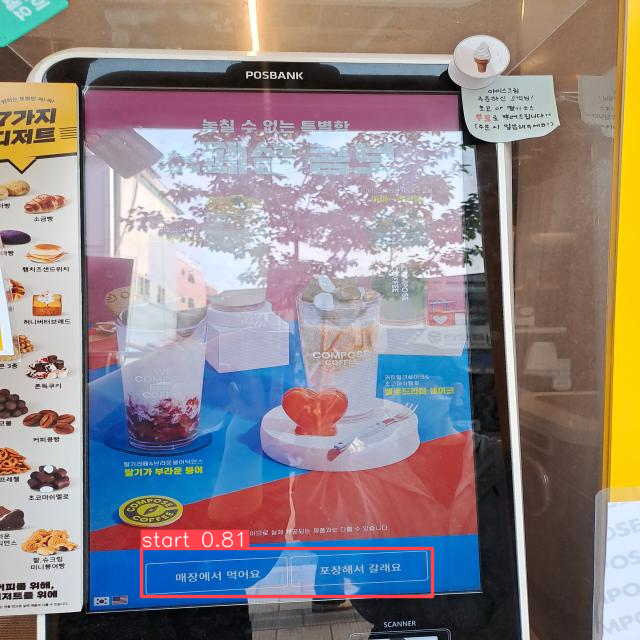


image 1/1 /content/OSP-4/test/images/-_01_jpg.rf.66161bc53b58a773c245b575c612676c.jpg: 640x640 1 payment_method, 16.0ms
Speed: 3.1ms preprocess, 16.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


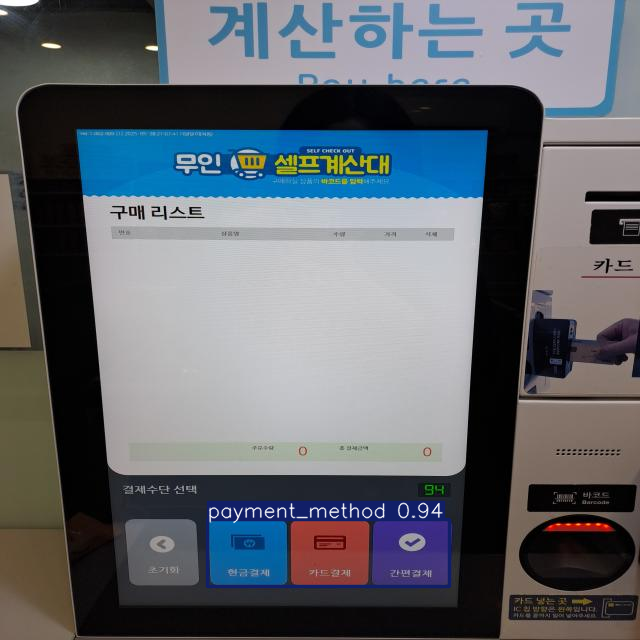


image 1/1 /content/OSP-4/test/images/-_01_jpg.rf.d77b273a437cc6b47d24f32cf9033eba.jpg: 640x640 1 receipt, 16.2ms
Speed: 2.9ms preprocess, 16.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


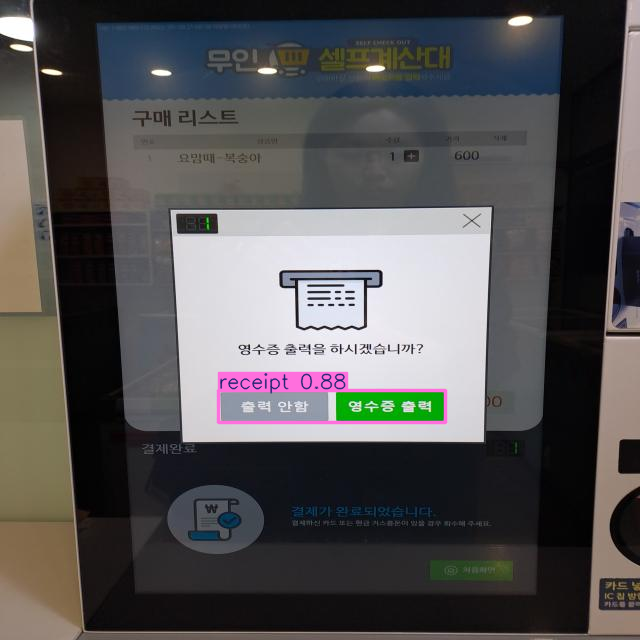


image 1/1 /content/OSP-4/test/images/-_02_jpg.rf.6af87014478096a56b679cf282272590.jpg: 640x640 1 receipt, 16.1ms
Speed: 3.3ms preprocess, 16.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


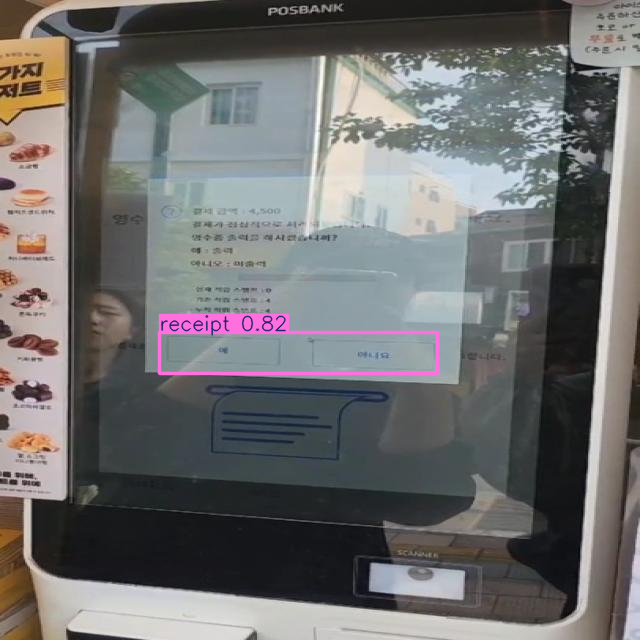


image 1/1 /content/OSP-4/test/images/-_01_jpg.rf.40ea5233da1ef1013f59e629ea74b0d9.jpg: 640x640 1 payment_method, 19.4ms
Speed: 3.0ms preprocess, 19.4ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)


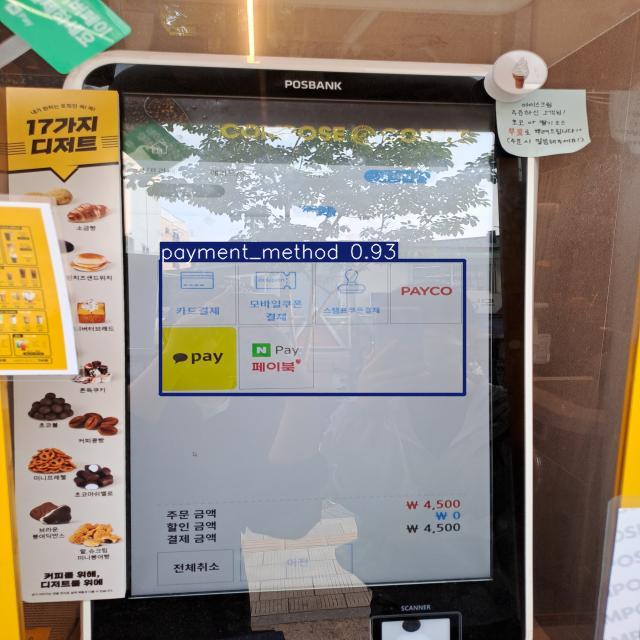


image 1/1 /content/OSP-4/test/images/-_01_jpg.rf.7bfeec7cc1e7892bbfe978e378e00685.jpg: 640x640 1 next, 16.0ms
Speed: 2.6ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


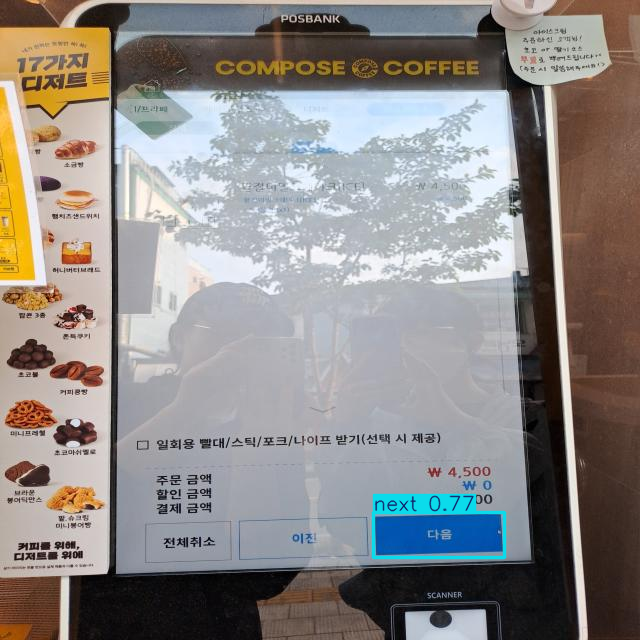


image 1/1 /content/OSP-4/test/images/-_01_jpg.rf.848030d8998c6ac449b00aad21f0f158.jpg: 640x640 1 start, 20.2ms
Speed: 3.0ms preprocess, 20.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


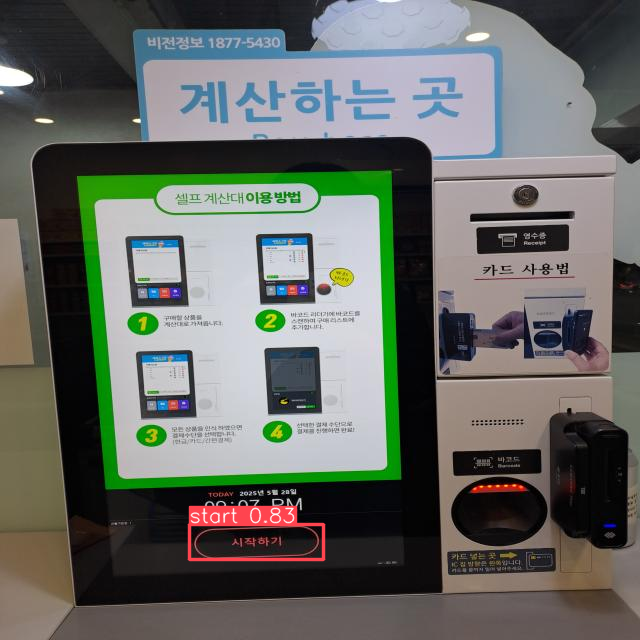


image 1/1 /content/OSP-4/test/images/-_01_jpg.rf.9755a4d34a26fd49c7db3c8973799f1a.jpg: 640x640 1 option_confirm, 16.0ms
Speed: 2.3ms preprocess, 16.0ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


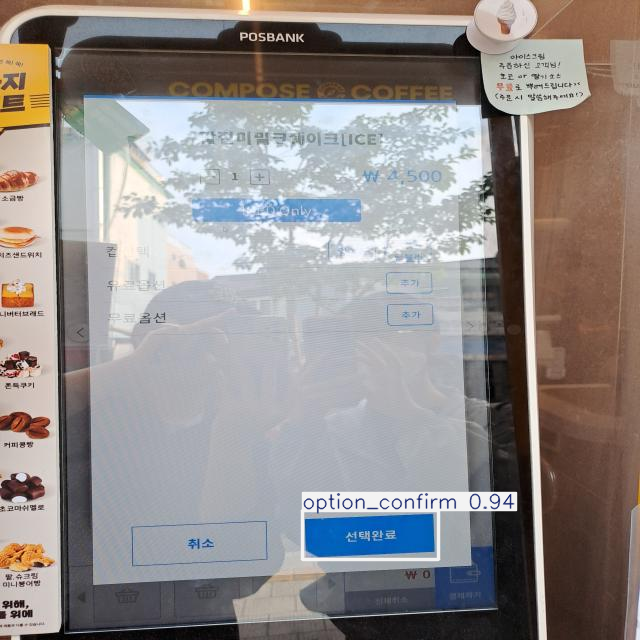


image 1/1 /content/OSP-4/test/images/-_02_jpg.rf.91554f0b1f5ed3053e9387c78c9560fb.jpg: 640x640 1 pay, 16.0ms
Speed: 3.1ms preprocess, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


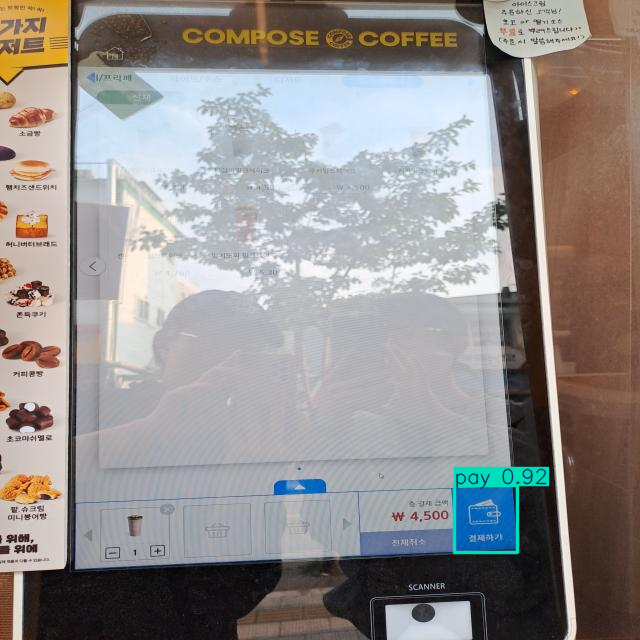


image 1/1 /content/OSP-4/test/images/-_02_jpg.rf.1dc0276b90bf6d7876dc8128940702eb.jpg: 640x640 1 payment_method, 18.2ms
Speed: 2.4ms preprocess, 18.2ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)


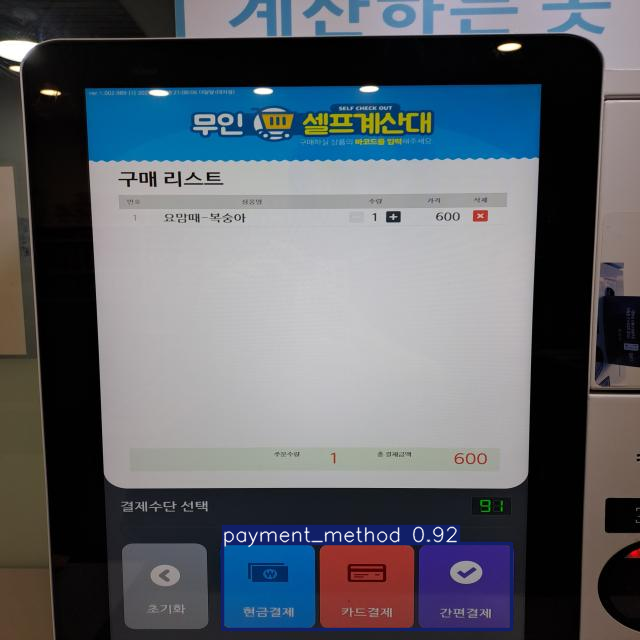

In [ ]:
# 학습된 모델 로드
model = YOLO('/content/runs/detect/yolov8s_custom/weights/best.pt')

# 이미지 추론
import glob

# test 이미지 폴더 경로
test_img_dir = '/content/OSP-4/test/images/'

# 모든 이미지 파일 리스트 얻기 (jpg, png 등)
img_list = glob.glob(test_img_dir + '*.*')

for img_path in img_list:
    results = model(img_path)
    results[0].show()  # 바운딩박스, 클래스명 표시

# **학습 성능 시각화 코드**

가장 최근에 학습된 모델의 results.csv(학습결과) 자동으로 불러옴

In [ ]:
import os
import glob
import pandas as pd

# 1. yolov8s_custom* 폴더 중 최신 폴더 찾기
base_dir = 'runs/detect'
pattern = os.path.join(base_dir, 'yolov8s_custom*')
folders = glob.glob(pattern)

if not folders:
    raise FileNotFoundError("No yolov8s_custom* folders found in runs/detect/")
else:
    # 수정: 폴더 생성(수정) 시간 기준으로 최신 폴더 선택
    folders.sort(key=lambda x: os.path.getmtime(x))
    latest_folder = folders[-1]

# 2. 최신 폴더의 results.csv 경로
results_csv_path = os.path.join(latest_folder, 'results.csv')
if not os.path.exists(results_csv_path):
    raise FileNotFoundError(f"results.csv not found in {latest_folder}")

Box Loss 그래프: 학습/검증 박스 손실 추이

Precision-Recall 그래프: 정밀도와 재현율 변화
  (재현율 : 실제 정답 객체 중 모델이 정답으로 검출한 객체 수 -> 그냥 정확도로 생각해도 될듯)

mAP 그래프: 0.5 IoU, 0.5-0.95 IoU 기준 mAP 변화
  (정확도,재현율의 관계 평가 -> mAP값이 높으면 객체 탐지율이 높은 것)

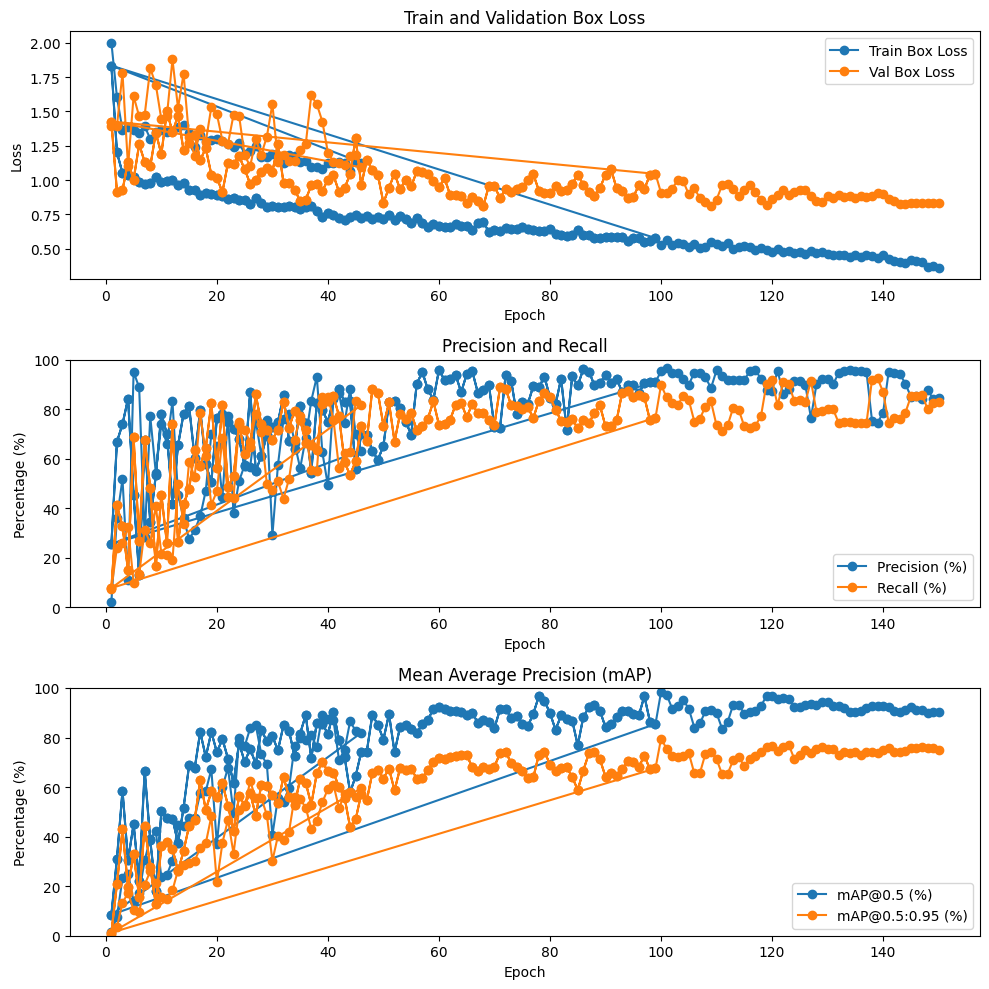

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(results_csv_path) # 위에서 구한 결과 csv 파일 경로 불러옴

plt.figure(figsize=(10, 10))

# 1. Train/Val Box Loss
plt.subplot(3, 1, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', marker='o')
plt.title('Train and Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2. Precision and Recall (0~100%)
plt.subplot(3, 1, 2)
plt.plot(df['epoch'], df['metrics/precision(B)']*100, label='Precision (%)', marker='o')
plt.plot(df['epoch'], df['metrics/recall(B)']*100, label='Recall (%)', marker='o')
plt.title('Precision and Recall')
plt.xlabel('Epoch')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # y축을 0~100으로 고정
plt.legend()

# 3. mAP@0.5 and mAP@0.5:0.95 (0~100%)
plt.subplot(3, 1, 3)
plt.plot(df['epoch'], df['metrics/mAP50(B)']*100, label='mAP@0.5 (%)', marker='o')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)']*100, label='mAP@0.5:0.95 (%)', marker='o')
plt.title('Mean Average Precision (mAP)')
plt.xlabel('Epoch')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # y축을 0~100으로 고정
plt.legend()

plt.tight_layout()
plt.show()


모델 성능 수치화해서 출력
-> 이거를 깃헙에 올릴 때 커밋 메시지에 포함해 주세요!
예) 모델 성능 : Epoch 150, batch 16 => mAP@0.5=82.1%, mAP@0.5:0.95=63.4%, Precision=87.2%, Recall=71.5%

In [ ]:
from ultralytics import YOLO

# 학습된 모델 로드
model = YOLO('runs/detect/yolov8s_custom/weights/best.pt')

# test셋에서 평가
metrics = val_results

# 주요 성능 지표 명시적으로 출력
print(f"mAP@0.5: {metrics.box.map50*100:.2f}%")
print(f"mAP@0.5:0.95: {metrics.box.map*100:.2f}%")
print(f"Precision: {metrics.box.mp*100:.2f}%")
print(f"Recall: {metrics.box.mr*100:.2f}%")


mAP@0.5: 99.50%
mAP@0.5:0.95: 76.56%
Precision: 91.91%
Recall: 100.00%


# 학습 결과 내 드라이브에 자동 저장
best.pt 파일과, 에폭, batch값, 성능 지표4가지값 모두 자동 저장되도록 함.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO
import os

# 드라이브 내 저장 경로
save_base = '/content/drive/MyDrive/OSS_yolo_weights'
save_dir = os.path.join(save_base, f'ep{epochs}_batch{batch}')
os.makedirs(save_dir, exist_ok=True)

# best.pt, data.yaml 경로
best_pt_path = 'runs/detect/yolov8s_custom/weights/best.pt'
data_yaml_path = 'runs/detect/yolov8s_custom/data.yaml'

# 모델 로드 및 평가
model = YOLO(best_pt_path)

# 성능지표 텍스트 생성 (자동 추출)
performance_text = f"""mAP@0.5: {metrics.box.map50*100:.2f}%
mAP@0.5:0.95: {metrics.box.map*100:.2f}%
Precision: {metrics.box.mp*100:.2f}%
Recall: {metrics.box.mr*100:.2f}%
Epoch: {epochs}
Batch size: {batch}
"""

# best.pt 복사
import shutil
shutil.copy(best_pt_path, os.path.join(save_dir, 'best.pt'))

# 성능지표 txt 저장
metrics_save_path = os.path.join(save_dir, 'performance.txt')
with open(metrics_save_path, 'w') as f:
    f.write(performance_text)

print(f"best.pt와 성능지표가 {save_dir}에 저장되었습니다.")


best.pt와 성능지표가 /content/drive/MyDrive/OSS_yolo_weights/ep150_batch32에 저장되었습니다.
